# Gradient Descent e Aplicação Prática

## Objetivo

O algoritmo de gradient Descent talvez seja o algoritmo de otimização mais simples e popular para a resolução de problemas de regressão. Neste singelo notebook desejamos introduzir de forma simples e didatica o funcionamento do algoritmo ao mesmo tempo em que tentamos construi-lo "do zero", imitando sua lógica de funcionamento dentro da lógica do python. É lógico que este exercício conta com uma série de facilidades pois nos utilizaremos de bibliotecas prontas para a computação de operações com vetores e para a realização dos problemas de otimização, porém nosso objetivo aqui é tentar ser o mais didático o possivel e mostrar seu funcionamento passo a passo.

## Bibliotecas 

- `random` : Utilização para geração de distribuições e dados aleatorios para os dados de exemplo
- `matplotlib.pyplot` : Utilizado para construção dos gráficos
- `numpy` : Operações vetoriais
- `scipy` : Otimização
- `sympy` : Uitlizado para a computação e geração de derivadas e operações de calculo com simbolos;
- `IPython` : Display de video e animação
- `matplotlib.animation`: Utilizado para produção de animação

## Dados de exemplo

Para esse caso em especifíco não utilizaremos um conjunto de dados reais, mas sim um conjunto de dados reais produzido com o pacote nativo do python `random`, esse será um \textit{dataset} simples, contando apenas com duas variaveis respectivamente $Y_{i}$ e $X_{i}$, de modo que tenhamos um modelo linear simples baseado na formula abaixo:

$$ Y_{i} = \beta_{0} + \beta_{1} X_{i} + \epsilon_{i} $$

- $X_{i}$ ~ N(0, 1)
- $\beta_{0}$ ~ N(15, 1)
- $\beta_{1}$ ~ N(-2, 1)

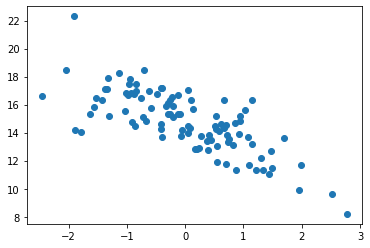

In [2]:
from random import seed, gauss 
import matplotlib.pyplot as plt
import sympy
import scipy as sc
import numpy as np
import pandas as pd

seed( 1002 )

a = [ gauss( mu = 15, sigma = 1 ) for i in range(0,100) ]
b = [ gauss( mu = -2, sigma = 1 ) for i in range(0,100) ]
x = [ gauss( 0, sigma = 1 ) for i in range(0,100) ]

dta = { "x" : x,
        "y" : [ a[i] + b[i]*x[i] for i in range(0,100) ] }

#print( x )
#print( y )


plt.scatter( dta['x'], dta['y'] )
plt.show()


In [2]:


# Otimizacao Chutada

def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return b, m


h_w = update_weights( m = 0, b = 0, X = x, Y = dta['y'], learning_rate = .5 )

#iterando( m_ini = -3, b_ini = 2, x = x, y = y, l_rate = 1, iters = 100 )



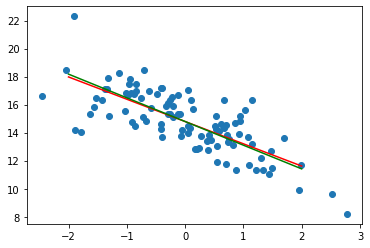

[14.79606439 -1.59138055]
(14.79664109473514, -1.6915863538017837)


In [3]:

# Parametros via "statsmodels"

import statsmodels.api as sm

x0 = [ 1 for i in range( 0, len( x ) ) ]

model = sm.OLS( dta['y'], sm.add_constant( x ) )

parameters = model.fit().params

x_hat  = [ i for i in range( int( min( x ) ), int( max( x ) ) + 1 ) ]

y_hat2 = [ h_w[0] + h_w[1]*i for i in x_hat ]
y_hat  = [ parameters[0] + parameters[1]*i for i in x_hat ]

plt.scatter( x, dta['y'] )
plt.plot( x_hat, y_hat, color = "red" )
plt.plot( x_hat, y_hat2, color = "green" )
plt.show()

print( parameters )
print( h_w )

In [4]:


def cost_function( y: list, x: list, b: list, alpha = True ):
    '''
    Funcao de cost function dado parametros B
    @y - vetor ´y´ de variaveis dependentes
    @x - vetor ´x´ de variaveis explicativad
    @b - vetor ´b´ de parametros
    @alpha - boolean indicando se usara ou nao intercepto
    '''
    
    # Check Dimensions
    
    if alpha == True:
        if len( b ) != len( x ) + 1:
            raise Exception("Different dim numebrs between ´b´ and ´x´")
            
    else:
        if len( b ) != len ( x ):
            raise Exception("Different dim numebrs between ´b´ and ´x´")
    
    # Check List Sizes
    
    if np.sum( list( map( lambda x: len( x ) == len( y ), x ) ) ) != len( x ):
        raise Exception("Diferentes números de observações entre ´x´ e ´y´")
    
    # Built xs vars
    
    if alpha == True:
        x_vars = np.reshape( np.append( np.ones( ( len(y) ), dtype = int ), x ), (len(x)+1,len(y) ) )
    else:
        x_vars = x
        
    # Return cost value
    
    return np.mean( np.square( np.subtract( y, np.dot( b, x_vars ) ) ) )

#cost_function( y = dta['y'], x = [dta['x']], b = [1,1] )



In [5]:
from scipy.optimize import minimize

def min_cost( params ):
    
    a, c = params
    
    return cost_function( y = dta['y'], x = [dta['x']], b = [a, c ] )

results = minimize( min_cost, x0 = [1,1] , method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

print( results.x )

Optimization terminated successfully.
         Current function value: 2.023260
         Iterations: 90
         Function evaluations: 181
[14.79606438 -1.59138056]


In [6]:

import sympy


def creat_cost_exp_lin( y: list, x: list, alpha = True  ):
    '''
    Create a Error function for a linear model givem y and x vectors
    @y - Dependent variable Vector
    @x - Explanaible variable vectors..
    '''
    
    #if np.sum( list( map( lambda x: len( x ) == len( y ), x ) ) ) != len( x ):
    #        raise Exception("Diferentes números de observações entre ´x´ e ´y´")
        
    if alpha == True:
        return { "symbols" : ["y"]+[ j+str(i) for j in ["b","x"] for i in range( 0, len( x ) + 1 ) ],
                 "formula" : "( y0 - "+" - ".join([ 'b'+str(i) if i == 0 else 'b'+str(i)+'*x'+str(i) for i in range( 0, len( x ) + 1 ) ])+")**2" }
        
    else:
        return { "symbols" : ["y"]+[ j+str(i) for j in ["b","x"] for i in range( 1, len( x ) + 1 ) ],
                 "formula" : "( y0 - "+" - ".join([ 'b'+str(i)+'*x'+str(i) for i in range( 1, len( x )+1 ) ])+")**2" }
        
    
#first_part = creat_cost_exp_lin( y = dta['y'], x = [dta['x']], alpha = False )  

#print( first_part )


def getting_partials( symbols: list, formula: str, sym: str ):

    exp = ", ".join(symbols)+" = sympy.symbols( '"+", ".join(symbols)+"')"
    
    exec( exp )
    
    return sympy.diff( formula, sym )

#parcial_der = getting_partials( symbols = first_part["symbols"], formula = first_part["formula"], sym = "b1" )
    

# parcial_der.subs({ "b0" : 1, 
#                    "b1" : 1 })
    
    
    
def gradient_descent( par, y, x, lr, alpha = True ):
    '''
    Gradient Descent Function:
    @par - parameters reffered as initial guesses
    @y   - Vector of dependent variable
    @x   - Vector of explainable variables
    @lr  - learning rate
    @alpha - Boolean indicating presence or not of intercept
    '''
    
    # Check dimensions
    
    #print( "par: ", len( par ), " x: ", len( x ) )
    
    if alpha == True:
        
        if len( par ) != len( x ) + 1 :
            raise Exception("Dimension ERROR n dim of ´b´ different of n dim of ´x´")
            
    else:
        if len( par ) != len( x ):
            raise Exception("Dimension ERROR n dim of ´b´ different of n dim of ´x´")
            
    # Check size of elements
    
    if np.sum( list( map( lambda x: len( x ) == len( y ), x ) ) ) != len( x ):
            raise Exception("Diferentes números de observações entre ´x´ e ´y´")
        
    # Calculate Gradient Descent
    
    sf = creat_cost_exp_lin( y = y, x = x, alpha = alpha  )
    
    p_derives, costs = np.zeros( len( x ) + 1*alpha ), []
    
    
    # Ajusting derivatives settings
    
    exp = ", ".join(sf['symbols'])+" = sympy.symbols( '"+", ".join(sf['symbols'])+"')"
    
    exec( exp )
    
    for i in range( len( y ) ):
        
        ys = { "y0" : y[ i ] }
        
        if alpha == True:
            xs = { ("x" + str(k)):(1 if k == 0 else x[k-1][i]) for k in range( 0, len( x ) + 1*alpha ) }
            bs = { "b" + str(k):par[k] for k in range(0, len( par ) ) } 
            
        else:
            xs = { ("x" + str(k)):x[k-1][i] for k in range( 1, len( x ) + 1 ) }
            bs = { "b" + str(k+1):par[k] for k in range(0, len( par ) ) } 

        for j in range( len( x ) + 1*alpha ):
        
            # Calculate partial derivatives at each observation
            # print( sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ] )
            # print( sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ][ j ] )
            
            # print( sympy.diff( sf['formula'], sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ][ j ] ) )
            # print( "xs: ", xs )
            # print( "bs: ", bs )
            # print( "ys: ", ys )
            # print( {**ys, **xs, **bs} )
            
            p_derives[ j ] += sympy.diff( sf['formula'], sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ][ j ] ).subs( {**ys, **xs, **bs} )
            costs.append( sympy.sympify( sf['formula'] ).subs( {**ys, **xs, **bs} ) )
        
    return [list( map( lambda s: s/float( len( y ) )*lr , p_derives ) ), np.sum(costs) ]

# print( gradient_descent( par = [1,1], y = dta['y'] , x = [dta['x']], lr = 0.7 , alpha = True ) )


def update_weights( x, y, b, iters, learn_r, alpha = True ):
    '''
    Update Weights
    @x - 
    @y - 
    @b - 
    @iters -
    '''
    w_current = b
    weights_hist = [ w_current ]
    cost = []
    
    for j in range(0, iters):
        gradients = gradient_descent( par = w_current, y = y, x = x, lr = learn_r , alpha = alpha )
        w_current = np.subtract( w_current, gradients[0] )
        # print( gradients[0], gradients[1] )
        # print( "Iteration ",j, ", pars: ", w_current )
        weights_hist.append( w_current )
        cost.append( gradients[1] )
        
    return [ w_current, weights_hist, cost ]
        
        
        
results = update_weights( x = [dta['x']], y = dta['y'] ,b = [1,1], iters = 50, learn_r = 0.3 , alpha = True )   
        
        
        
        



In [22]:
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import numpy as np 
from IPython import display
  
   
#
#
fig = plt.figure() 
axis = plt.axes(xlim =(np.min( dta['x']), np.max( dta['x'])),
                ylim =(np.min( dta['y']), np.max( dta['y']))) 
  
axis.scatter( dta['x'], dta['y'])
line, = axis.plot([], [], lw = 2,color = "red") 
   
# what will our line dataset
# contain?
def init(): 
    line.set_data([], []) 
    return line, 
   
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], [] 
   
# animation function 
def animate(i): 
    global x_hat
    global results
    # x, y values to be plotted 
    x = x_hat
    y = [ results[1][i][0] + results[1][i][1]*k for k in x_hat ]
    
    label = 'Iteracao: {0}'.format(i)
    # appending values to the previously 
    # empty x and y data holders 
    xdata.append( x ) 
    ydata.append( y ) 
    line.set_data(x, y) 
    axis.set_xlabel(label)
      
    return line,


# calling the animation function   
anim = animation.FuncAnimation(fig, animate, init_func = init, 
                               frames = 20, interval = 140, blit = True) 

video = anim.to_html5_video()
html  = display.HTML(video)
display.display(html)
plt.close()

#plt.show()

# anim.save('grad_desc.gif', writer = 'ffmpeg', fps = 7)

In [10]:

def cost_func_manual( a, y, x):
    s = 0
    for i in range( len( y ) ):
        s += ( y[i] - a[0] - a[1]*x[i] )**2   
    return s/len( y )

list( [ ]

cost_func_manual( a = [1, 1], y = dta['y'], x = dta['x'] )
    

199.49603645933124


# Regressão Logistica

A principio os modelos de regressão logística são exemplos de modelos de classificação binária, ou seja, classificam com base num conjunto de caracteristicas $X$ a variável dependente $y$ , aonde $y \in [0,1]$ .

A príncipio é possível aplicar o modelo de $MQO$ no problema de classificação binária, nesse caso seria nomeado como um modelo de probabilidade linear, como representado na forma abaixo:

$$ y_{i} = \beta'X_{i} $$

Porém existem uma séries de problemas incorridos ao se utilizar um modelo de probabilidade linear , abaixo listaremos alguns:
1. Assume que a probabilidade do evento é linearmente dependente das variaveis explicativas;
2. Como existe essa implicaçao de relação linear de $f(x)$ em relação a $x$, se aplicarmos os limites de $x$ para os extremos da reta $\mathbb{R}$ temos que:
$$ lim_{X \rightarrow \infty} f(x) = \infty$$ 
$$lim_{X \rightarrow -\infty} f(x) =  -\infty $$
Ou seja é possivel termos valores de probabilidades em toda reta $\mathbb{R}$ o que atrapalha a interpretação dos resultados;

Apesar dos problemas envolvendo a relação direta entre a saída binaria $[0,1]$, a regressão logística ainda usa a relação linear das variaveis só que utiliza se utiliza das chamadas variáveis latentes como método de modelagem.

Uma variável latente é uma variável não observavel, ou seja uma váriavel que "não existe", e que nesse caso oferece um suporte ou um link entre a saída binária $[0,1]$ da variável resposta $y$ e a saída do modelo linear que pertence ao conjunto $\mathbb{R}$, de forma que tenhamos uma função que $f:\mathbb{R}  \rightarrow [0,1]$ e que $f^{-1}:[0,1] \rightarrow \mathbb{R}$.

Primeiramente se parte da razão de probabilidades, chamada de $odds$,  dessa forma teriamos um modelo que ao invés de modelar diretamente a variavel $y$ modelaria a razão de chances de acordo com a formula abaixo:

$$ \frac{y_{i}}{1-y_{i}} = \beta'X$$

Se aplicarmos os limites de $y$ na função $odds$ teremos uma função que apenas cobre a parte positiva dos números reais e portanto ainda não cumpre a função de $f^{-1}:[0,1] \rightarrow \mathbb{R}$.

$$ lim_{y_{i} \rightarrow 0 } \frac{y_{i}}{1-y_{i}} = 0 $$

$$ lim_{y_{i} \rightarrow 1 } \frac{y_{i}}{1-y_{i}} = \infty $$

Porém se modificarmos a função e utilizarmos o logaritmo da razão de probabilidade teremos uma função link que atenderá os requisitos como mostram os limites abaixo:


$$ lim_{y_{i} \rightarrow 0 } log(\frac{y_{i}}{1-y_{i}}) = -\infty $$

$$ lim_{y_{i} \rightarrow 1 } log(\frac{y_{i}}{1-y_{i}}) = \infty $$

Dessa forma a regressão logística pode ser definida como:

$$ log(\frac{y_{i}}{1-y_{i}}) = \beta'X$$

Podemos manipular algebricamente essa função e isolar $y_{i}$, sendo o primeiro passo aplicando a função exponencial em ambas as partes da equação

$$ e^{  log(\frac{y_{i}}{1-y_{i}}) } = e^{\beta'X} $$

$$ \frac{y_{i}}{1-y_{i}} = e^{\beta'X} $$

E depois isolando $y$ em função de $X$:

$$ y_{i} = e^{\beta'X} - y_{i}e^{\beta'X} $$

$$ y_{i} + y_{i}e^{\beta'X}= e^{\beta'X} $$

$$ y_{i}(1 + e^{\beta'X})= e^{\beta'X} $$

$$ y_{i} = \frac{ e^{\beta'X}}{1 + e^{\beta'X}} $$

Para facilitar algumas notações se resume a função a chamata função sigma:

$$ y_{i} = \frac{ e^{\beta'X}}{1 + e^{\beta'X}} = \sigma(\beta'X)$$

## Função Custo
 Até agora formulamos basicamente os fundamentos que permeiam como uma regressao logística é construida, passando pelo problema dos modelos de probabildiade lineares, essencialmente regressões lineares aplicadas a stiuações de saída binaria, e mostrando o que são variaveis latentes e como essas são aplicadas na regressão logística. Mas agora vem a parte importante: Como estimamos isso?

Para estimaros uma regressão logística precisamos definir alguma função alvo/custo que queiramos minimizar, o ponto de partida dessa função é a função de massa de probabilidade de Bernoulli:
$$ P(Y = y|X = x) $$

$$ L(\beta) =\sigma(\beta'X)^{y}*[1 - \sigma(\beta'X)]^{1-y} $$

Da função de massa de probabilidade passamos para a função de verossimilhança e logo após a função de $log$ verossimilhança:

$$ L(\beta) = \prod_{i=1}^{n} \sigma(\beta'X_{i})^{y_{i}}*[1 - \sigma(\beta'X_{i})]^{1-y_{i}}$$

$$ LL(\beta) = \sum_{i=1}^{n} y_{i}*log(\sigma(\beta'X_{i}))+(1-y_{i})*log([1 - \sigma(\beta'X_{i})])$$

Assim chegamos a função $log$ verossimilhança, com base nela é possivel aplicar derivadas da função de log verossimilhança em função dos parametros betas, aonde se encontra os parametroes que minimizem a função custo.

$$ \frac{\partial LL(\beta_{j})}{\partial \beta_{j}} = \sum_{i=1}^{n} [y_{i}-\sigma(\beta_{j}'X_{ij})]X_{ ij}$$


## Apêndice

Abaixo um destrinchamento de como a função de entropia cruzada é transformada na função custo pelo método de máximo verossimilhança:
$$ LL(\beta) = \sum_{i=1}^{n} y_{i}*log(\sigma(\beta'X_{i}))+(1-y_{i})*log([1 - \sigma(\beta'X_{i})])$$

Primeira parte:
$$ \frac{\partial LL(\beta_{j})}{\partial \beta_{j}} = \sum_{i=1}^{n}y_{i}*log( \sigma (\beta_ {j}'X_{ij}) ) $$

Para simplificar o problema dessa derivadas é necessario aplicar a regra da cadeia, dividindo as funções em duas partes.

$$ y(u) = log( u ) $$

$$ u(x) = \sigma( \beta'X ) $$

Para a resolução da função $\sigma( \beta'X )$ é necessario aplicar a regra de derivadas da divisão, sendo assim os resultados serão:
$$ \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} = \frac{1}{u}*\frac{ x* e^{\beta'X}}{(1+e^{\beta'X})^2} $$

$$ \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} = \frac{1+e^{\beta'X}}{e^{\beta'X}}*\frac{ x* e^{\beta'X}}{(1+e^{\beta'X})^2} $$

$$ \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} = \frac{1+e^{\beta'X}}{e^{\beta'X}}*\frac{ x* e^{\beta'X}}{(1+e^{\beta'X})^2} $$

$$ \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} = \frac{x}{1+e^{\beta'X}} $$

$$ \frac{\partial}{\partial \beta_{j}} y_{i}*log( \sigma (\beta_ {j}'X_{ij}) = \frac{y_{i}x}{1+e^{\beta'X}} $$

Segunda Parte:
$$ \frac{\partial LL(\beta_{j})}{\partial \beta_{j}} = \sum_{i=1}^{n}(1-y_{i})*log([1 - \sigma(\beta'X_{i})]) $$

Da mesma forma que na primeira etapa também utilizaremos a regra da cadeia como forma de resolver a derivada

$$ y(u) = log( u ) $$

$$ u(x) = 1-\sigma( \beta'X ) $$
$$ \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} = \frac{1}{u}*\frac{ x* e^{\beta'X}}{(1+e^{\beta'X})^2} $$

$$ \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} = \frac{1+e^{\beta 'X}}{1}*\frac{ x* e^{\beta'X}}{(1+e^{\beta'X})^2} $$

$$  \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} = \frac{ x* e^{\beta'X}}{1+e^{\beta'X}}$$


$$ \frac{\partial}{\partial \beta_{j}} (1-y_{i})*log([1 - \sigma(\beta'X_{ij})]) = \frac{( 1-y_{i})x_{j} e^{\beta'X_{j}}  }{1+e^{\beta'X_{j}}} $$
Juntando as duas partes teremos:

$$  \frac{\partial LL(\beta)}{\partial \beta_{j}} = \frac{y_{i}x_{ij}}{1+e^{\beta_{j}'X_{ij}}} - \frac{( 1-y_{i})x_{ij} e^{\beta_{j}'X_{ij}}  }{1+e^{\beta'X_{ij}}}$$



$$ = \frac{ y_{i}x_{ij} - x_{ij} e^{\beta_{j}'X_{ij}} + y_{i}x_{ij} e^{\beta_{j}'X_{ij}} }{ 1+e^{\beta_{j}'X_{ij}} } $$

$$ = \frac{ y_{i}x_{ij}(1+e^{\beta_{j}'X_{ij}}) - x_{ij} e^{\beta_{j}'X_{ij}}   }{ 1+e^{\beta_{j}'X_{ij}} } $$

$$ = \frac{ x_{ij} ( y_{i}(1+e^{\beta_{j}'X_{ij}}) - e^{\beta_{j}'X_{ij}})   }{ 1+e^{\beta_{j}'X_{ij}} } $$

$$ = x_j (\frac{ y_{i}(1+e^{\beta_{j}'X_{ij}})   }{ 1+e^{\beta_{j}'X_{ij}} } - \frac{e^{\beta_{j}'X_{ij}}   }{ 1+e^{\beta_{j}'X_{ij}} }) $$

$$ \frac{\partial LL(\beta)}{\partial \beta_{j}} = ( y_{i} - \sigma(\beta_{j} 'X_{ij}) ) x_{ij} $$

Por fim fica demonstrado os passos que conseguem derivar a função de entropia cruzada para a função custo utilizada na regressão logística.

## Algoritmo de Gradient Descent

Após toda a introdução de toda lógica por traz de um modelo de regressão logística vamos ao seu algoritmo, da mesma forma que vimos no caso da estimação de um$MQO$ a estimação de uma regressão logística se utiliza do algoritmo de gradient descent. De início se colocam os parametros $\theta$ "chutados" a *learning rate* representada por $\eta$ e o número de iterações representada por $k$.

$$ \beta_{jk} = \beta_{j k-1} + \eta*\frac{\partial LL(\beta)}{\partial \beta_{j}}$$

sendo que na iteração $k=0$:

$$ \beta_{k} = \theta  $$

A cada iteração o valor dos parâmetros são atualizados. A intuição por traz do algoritmo é de que dado a nossa função custo derivada anteriormente, e dado um conjunto $\beta$ de parâmetros iniciais, é possivel calcular o gradiente dessa função custo, o gradiente, de forma resumida mostra as derivadas parciais da nossa função custo, em relação a cada uma das dimensões das nossas variaveis independentes. A partir dos parametros iniciais e do calculo desse gradiente seria possivel corrigir a rota desse parametro inicial de modo que se aproximasse o mais próximo possivel de um parametro que minimizasse os valores da nossa função custo.

O parametro $\eta$ representado por uma *learning* determinaria o tamanho do passo dado em direção a rota apontada pelo cálculo do gradiente, quanto menor o valor do parâmetro menor o passo, e quanto maior maior será o passo. Não necessariamente a utilização de valores maiores nos leva mais rapidamente a locais próximos do minimo, esse deve ser um parametro ajustado de acordo com o problema solucionado.

Por outro lado o número de iterações apresenta outra ótica, quanto maior o parâmetro, mais custoso será para estimar os parâmetros da regressão, porém quanto mais iterações fazemos mais próximos dos parâmetros reais que minimizam a função custo estaremos, é lógico que a partir de um determinado ponto, as variações no parâmetros estimado que minimiza a função custo serão quase que despreziveis sendo ajustadas em casas decimais ou até milesimais, da mesma forma que a learning rate é um parametro que deve ser ajustado de acordo com o problema.

Essencialmente, quando fazemos a derivação de uma regressão logística e a tentamos estimar com o algoritmo de gradient descent o que estamos fazendo é usando um algoritmo de multiplas iterações que busca dado o calculo dos gradientes se apróximar passo a passo do parametro que minimiza nossa função custo, o tamanho dos passos e a proximidade do parametro real são ajustaveis ao problema.



In [3]:
# Carregando dados de Exemplo


att_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

data = pd.read_csv( r"https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                    names = att_names )

cat_vars = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

data = ( data
         .assign( **{ col : data[col].astype(str) for col in cat_vars } ) )

data['y'] = [ 0 if k == 0 else 1 for k in data['num'] ]

data.head()



NameError: name 'pd' is not defined

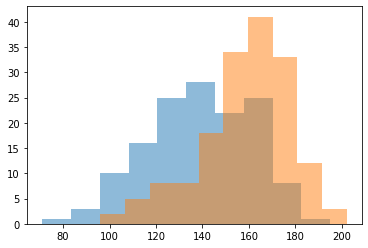

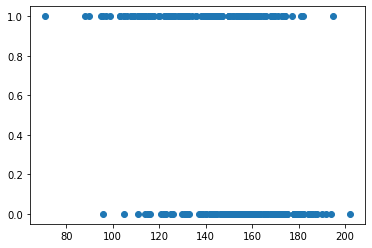

In [4]:
plt.hist( data.loc[ data['y'] == 1, 'thalach' ], alpha = 0.5 )
plt.hist( data.loc[ data['y'] == 0, 'thalach' ], alpha = 0.5 )
plt.show()

plt.scatter( data['thalach'], data['y'] )
plt.show()

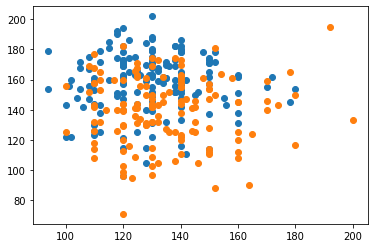

In [5]:
plt.scatter( data.loc[ data['y'] == 0, 'trestbps' ], data.loc[ data['y'] == 0, 'thalach' ] )
plt.scatter( data.loc[ data['y'] == 1, 'trestbps' ], data.loc[ data['y'] == 1, 'thalach' ] )

plt.show()

In [6]:
# Teste se utilizando de uma regressao logistica sci kit learn

from sklearn.linear_model import LogisticRegression

reg_log_mod = LogisticRegression( ) 


model = reg_log_mod.fit( np.array( data['thalach'] ).reshape(-1,1), 
                         np.array( data['y'] ).reshape(-1, 1 ) )


print(model.coef_, model.intercept_ )

[[-0.04340928]] [6.32467334]


C:\Users\yurim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:

from scipy.optimize import minimize
from scipy.optimize import fmin

np.seterr(divide = 'ignore') 

def sigmoid( b:list, x:list ):
    
    # exp( b'x ) / ( 1 + exp( b'x ) )
    return np.exp( np.dot( b, x ) )/ ( 1 + np.exp( np.dot( b, x ) ) )


def cost_function_log( y: list, x: list, b: list, alpha = True ):
    '''
    Funcao de cost function dado parametros B
    @y - vetor ´y´ de variaveis dependentes
    @x - vetor ´x´ de variaveis explicativad
    @b - vetor ´b´ de parametros
    @alpha - boolean indicando se usara ou nao intercepto
    '''
    
    # Check Dimensions
    
    if alpha == True:
        if len( b ) != len( x ) + 1:
            raise Exception("Different dim numebrs between ´b´ and ´x´")
            
    else:
        if len( b ) != len ( x ):
            raise Exception("Different dim numebrs between ´b´ and ´x´")
    
    # Check List Sizes
    
    if np.sum( list( map( lambda x: len( x ) == len( y ), x ) ) ) != len( x ):
        raise Exception("Diferentes números de observações entre ´x´ e ´y´")
    
    # Built Xs vars
    
    if alpha == True:
        x_vars = np.reshape( np.append( np.ones( ( len(y) ), dtype = int ), x ), (len(x)+1,len(y) ) )
    else:
        x_vars = x
        
    # Return cost value
    
    Sig = sigmoid( b, x_vars )
    
    # y*log( Sigmoid(b'X) )
    out_1 = -y*np.log( Sig )
    
    # (1-y)*log( 1 - Sigmoid(b'X) )
    out_2 = (1 - y)*np.log( (1 - Sig) ) 
    
    return np.sum( ( out_1 - out_2 ) )
    
    # return np.add( np.dot( y ,np.log( sigmoid( b, x_vars ) ) ), 
    #                np.dot( np.subtract( np.ones( len(y) ), y ), np.log( np.subtract( np.ones( len(y) ), sigmoid( b, x_vars ) ) ) ) )


def min_cost_log( params ):
    
    a, c = params
    
    return cost_function_log( y = np.array(data['y']), x = [np.array(data['thalach'])], b = [a, c ], alpha = True )

results = minimize( min_cost_log, x0 = [0,0] ,method='bfgs')
#result2 = fmin( min_cost_log, x0 = [1,1] )


In [8]:
print( results.x )

[ 6.32501678 -0.04341157]


In [49]:


def create_cost_log_loss( y: list, x: list, alpha = True  ):
    '''
    Create a Error function for a linear model givem y and x vectors
    @y - Dependent variable Vector
    @x - Explanaible variable vectors..
    '''
    
    if alpha == True:
        lin_form = " + ".join([ 'b'+str(i) if i == 0 else 'b'+str(i)+'*x'+str(i) for i in range( 0, len( x ) + 1 ) ])
        symbols  = ["y"]+[ j+str(i) for j in ["b","x"] for i in range( 0, len( x ) + 1 ) ]
    else:
        lin_form = " - ".join([ 'b'+str(i)+'*x'+str(i) for i in range( 1, len( x )+1 ) ])
        symbols  = ["y"]+[ j+str(i) for j in ["b","x"] for i in range( 1, len( x ) + 1 ) ]
    
    # Cosntroi a formula Log loss em duas partes
    # z = B'X
    # sig( z ) = exp( z )/( 1 + exp( z ) )
    # pt1: "- y*log( exp( sig(z) )/(1+exp( siz(z) ) ) "
    
    pt1 = "- y*log( exp( "+lin_form+" )/(1+exp( "+lin_form+" ) ) ) "
    
    # pt2:- (1 - y)*log( ( 1 - ( exp( sig(z) )/(1+exp( sig(z) )) ) )
    
    pt2 = "- (1 - y)*log( ( 1 - ( exp( "+lin_form+" )/(1+exp( "+lin_form+" )) ) ) )"
    
    return { "symbols" : symbols,
             "formula" : pt1+pt2 }



def getting_partials( symbols: list, formula: str, sym: str ):

    exp = ", ".join(symbols)+" = sympy.symbols( '"+", ".join(symbols)+"')"
    
    exec( exp )
    
    return sympy.diff( formula, sym )

    
def gradient_descent( par, y, x, lr, alpha = True ):
    '''
    Gradient Descent Function:
    @par - parameters reffered as initial guesses
    @y   - Vector of dependent variable
    @x   - Vector of explainable variables
    @lr  - learning rate
    @alpha - Boolean indicating presence or not of intercept
    '''
    
    # Check dimensions
    
    #print( "par: ", len( par ), " x: ", len( x ) )
    
    if alpha == True:
        
        if len( par ) != len( x ) + 1 :
            raise Exception("Dimension ERROR n dim of ´b´ different of n dim of ´x´")
            
    else:
        if len( par ) != len( x ):
            raise Exception("Dimension ERROR n dim of ´b´ different of n dim of ´x´")
            
    # Check size of elements
    
    if np.sum( list( map( lambda x: len( x ) == len( y ), x ) ) ) != len( x ):
            raise Exception("Diferentes números de observações entre ´x´ e ´y´")
        
    # Calculate Gradient Descent
    
    sf = create_cost_log_loss( y = y, x = x, alpha = alpha  )
    
    p_derives, costs = np.zeros( len( x ) + 1*alpha ), []

    # Ajusting derivatives settings
    
    exp = ", ".join(sf['symbols'])+" = sympy.symbols( '"+", ".join(sf['symbols'])+"')"
    
    exec( exp )
    
    for i in range( len( y ) ):
        
        ys = { "y" : y[ i ] }
        
        if alpha == True:
            xs = { ("x" + str(k)):(1 if k == 0 else x[k-1][i]) for k in range( 0, len( x ) + 1*alpha ) }
            bs = { "b" + str(k):par[k] for k in range(0, len( par ) ) } 
            
        else:
            xs = { ("x" + str(k)):x[k-1][i] for k in range( 1, len( x ) + 1 ) }
            bs = { "b" + str(k+1):par[k] for k in range(0, len( par ) ) } 

        for j in range( len( x ) + 1*alpha ):
        
            # Calculate partial derivatives at each observation
            # print( sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ] )
            # print( sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ][ j ] )
            
            # print( sympy.diff( sf['formula'], sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ][ j ] ) )
            # print( "xs: ", xs )
            # print( "bs: ", bs )
            # print( "ys: ", ys )
            #print( {**ys, **xs, **bs} )
            #print( sf['formula'], sf['symbols'] )
            #print( sympy.diff( sf['formula'], sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ][ j ] ), "\n" )
            #p_derives[ j ] += sympy.diff( sf['formula'], sf['symbols'][ 1 : len( x ) + 1 + 1*alpha ][ j ] ).subs( {**ys, **xs, **bs} )
            costs.append( sympy.sympify( sf['formula'] ).subs( {**ys, **xs, **bs} ) )
        
    return [list( map( lambda s: s/float( len( y ) )*lr , p_derives ) ), np.sum(costs) ]

def update_weights( x, y, b, iters, learn_r, alpha = True ):
    '''
    Update Weights
    @x - 
    @y - 
    @b - 
    @iters -
    '''
    w_current = b
    weights_hist = [ w_current ]
    cost = []
    
    for j in range(0, iters):
        gradients = gradient_descent( par = w_current, y = y, x = x, lr = learn_r , alpha = alpha )
        w_current = np.subtract( w_current, gradients[0] )
        # print( gradients[0], gradients[1] )
        # print( "Iteration ",j, ", pars: ", w_current )
        weights_hist.append( w_current )
        cost.append( gradients[1] )
        
    return [ w_current, weights_hist, cost ]

results = update_weights( x = [data['trestbps']], y = data['y'] ,b = [0,0], iters = 50, learn_r = 0.3 , alpha = True )   
        
        
#funct_test = create_cost_log_loss( y = data['y'], 
#                                   x = [data['trestbps']],
#                                   alpha = True )

In [53]:
for i in results:
    print( i )

[0. 0.]
[[0, 0], array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.])]
[606*log(2), 606*log(2), 606*log(2), 606*log(2), 606*log(2), 606*log(2), 606*log(2), 606*log(2), 606*log(2), 606*log(2), 606*log(2), 

In [52]:
y, b0, b1, x0, x1 = sympy.symbols('y, b0, b1, x0, x1')

sympy.diff( funct_test['formula'], b1 )

-y*(x1*exp(b0 + b1*x1)/(exp(b0 + b1*x1) + 1) - x1*exp(2*b0 + 2*b1*x1)/(exp(b0 + b1*x1) + 1)**2)*(exp(b0 + b1*x1) + 1)*exp(-b0 - b1*x1) + (y - 1)*(-x1*exp(b0 + b1*x1)/(exp(b0 + b1*x1) + 1) + x1*exp(2*b0 + 2*b1*x1)/(exp(b0 + b1*x1) + 1)**2)/(1 - exp(b0 + b1*x1)/(exp(b0 + b1*x1) + 1))